In [2]:
import pandas as pd
import numpy as np

In [3]:
Billionaires = pd.read_csv('billionaires.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_2336\3950488824.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  Billionaires = pd.read_csv('billionaires.csv')


In [4]:
Billionaires.head()

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,self_made,wealth_status
0,1997,7,NaN,2.0 B,Sophonpanich,Chatri,Chatri Sophonpanich & family,28-02-1934,73.0,Male,Thailand,Thailand,Bangkok,Finance and Investments,['Finance and Investments'],False,NaN
1,1997,7,NaN,1.8 B,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,05-12-1927,69.0,Male,Thailand,NaN,NaN,NaN,NaN,False,NaN
2,1998,7,NaN,3.3 B,Safra,Edmond,Edmond Safra,06-08-1932,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,True,NaN
3,1999,7,NaN,1.0 B,Hinduja,"Srichand, Gopichand,",Srichand & Gopichand Hinduja,28-11-1935,NaN,NaN,India,United Kingdom,London,NaN,NaN,False,NaN
4,1999,7,NaN,7.1 B,Schwarz,Dieter,Dieter Schwarz,24-09-1939,59.0,Male,Germany,Germany,Neckarsulm,Fashion & Retail,['Fashion & Retail'],True,NaN


# Data Cleaning

In [5]:
Billionaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34511 entries, 0 to 34510
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    34511 non-null  int64  
 1   month                   34511 non-null  int64  
 2   rank                    34493 non-null  float64
 3   net_worth               34511 non-null  object 
 4   last_name               30822 non-null  object 
 5   first_name              30760 non-null  object 
 6   full_name               34511 non-null  object 
 7   birth_date              30044 non-null  object 
 8   age                     33765 non-null  float64
 9   gender                  30682 non-null  object 
 10  country_of_citizenship  34502 non-null  object 
 11  country_of_residence    33792 non-null  object 
 12  city_of_residence       33514 non-null  object 
 13  business_category       28669 non-null  object 
 14  business_industries     33521 non-null

### Fixing data types

In [6]:
Billionaires['net_worth'] = Billionaires['net_worth'].str.replace('B','')
Billionaires['net_worth'] = Billionaires['net_worth'].astype(float)
Billionaires['net_worth']

0        2.0
1        1.8
2        3.3
3        1.0
4        7.1
        ... 
34506    1.0
34507    1.0
34508    1.0
34509    1.0
34510    1.0
Name: net_worth, Length: 34511, dtype: float64

In [7]:
Billionaires.shape

(34511, 17)

### Fixing for Null values

In [8]:
Billionaires.isnull().sum() 

year                         0
month                        0
rank                        18
net_worth                    0
last_name                 3689
first_name                3751
full_name                    0
birth_date                4467
age                        746
gender                    3829
country_of_citizenship       9
country_of_residence       719
city_of_residence          997
business_category         5842
business_industries        990
self_made                 3689
wealth_status             7416
dtype: int64

[age = avg age]    
[drop birth_date and wealth_status column]   
[rest , Let there be nan values in other columns as they will not be used in any numerical calculations]   


In [9]:
Billionaires['age'].fillna(round(Billionaires['age'].mean()),inplace=True)
Billionaires['age']

C:\Users\Dell\AppData\Local\Temp\ipykernel_2336\2532772587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Billionaires['age'].fillna(round(Billionaires['age'].mean()),inplace=True)


0        73.0
1        69.0
2        65.0
3        63.0
4        59.0
         ... 
34506    63.0
34507    60.0
34508    66.0
34509    55.0
34510    60.0
Name: age, Length: 34511, dtype: float64

In [10]:
Billionaires['age'].isnull().sum()

0

In [11]:
Billionaires.drop(['birth_date','wealth_status'], axis=1 , inplace = True)

In [12]:
Billionaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34511 entries, 0 to 34510
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    34511 non-null  int64  
 1   month                   34511 non-null  int64  
 2   rank                    34493 non-null  float64
 3   net_worth               34511 non-null  float64
 4   last_name               30822 non-null  object 
 5   first_name              30760 non-null  object 
 6   full_name               34511 non-null  object 
 7   age                     34511 non-null  float64
 8   gender                  30682 non-null  object 
 9   country_of_citizenship  34502 non-null  object 
 10  country_of_residence    33792 non-null  object 
 11  city_of_residence       33514 non-null  object 
 12  business_category       28669 non-null  object 
 13  business_industries     33521 non-null  object 
 14  self_made               30822 non-null

All set to go to the next step

# Exploratory Data Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
len(Billionaires['full_name'].unique())

5301

Although data set contains 35000 rows only 5301 unique individuals are mentioned . It means that individuals are repeated , but it should not affect our analysis as billionaires are also evolving with the time-frame of the dataset as well as new individuals are added.

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


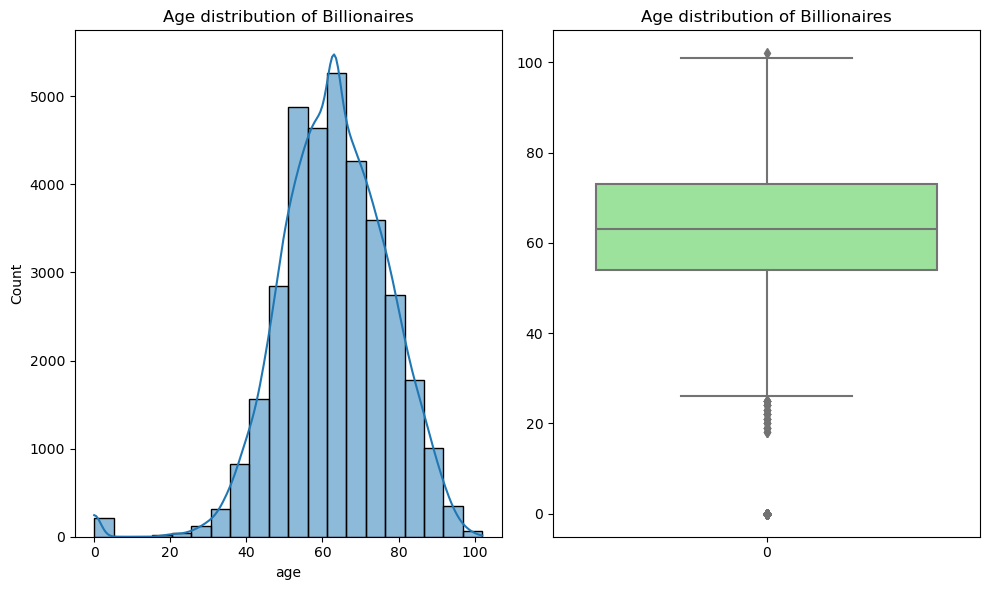

In [15]:
fig , axes = plt.subplots(1,2,figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(Billionaires['age'], kde=True,bins=20)
plt.title('Age distribution of Billionaires')

plt.subplot(1,2,2)
sns.boxplot(Billionaires['age'],color='lightgreen')
plt.title('Age distribution of Billionaires')

plt.tight_layout()
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


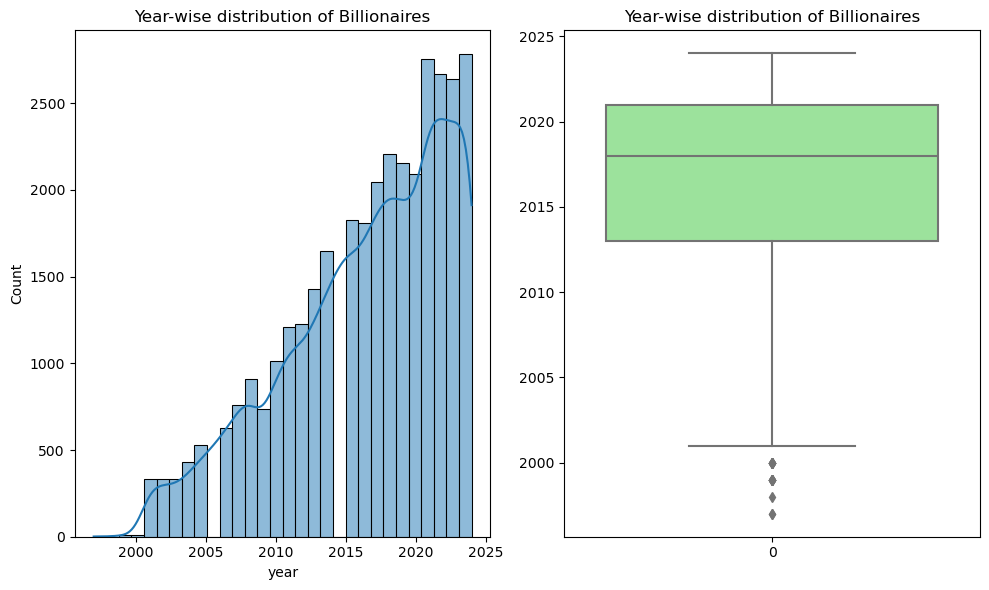

In [16]:
fig , axes = plt.subplots(1,2,figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(Billionaires['year'], kde=True,bins=30)
plt.title('Year-wise distribution of Billionaires')

plt.subplot(1,2,2)
sns.boxplot(Billionaires['year'],color='lightgreen')
plt.title('Year-wise distribution of Billionaires')

plt.tight_layout()
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


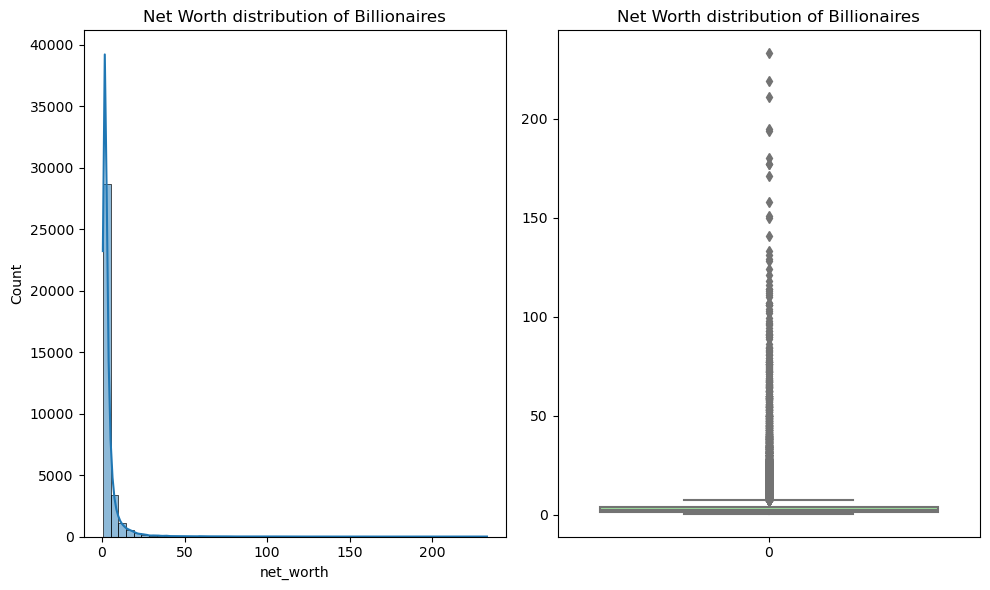

In [17]:
fig , axes = plt.subplots(1,2,figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(Billionaires['net_worth'], kde=True,bins=50)
plt.title('Net Worth distribution of Billionaires')

plt.subplot(1,2,2)
sns.boxplot(Billionaires['net_worth'],color='lightgreen')
plt.title('Net Worth distribution of Billionaires')

plt.tight_layout()
plt.show()

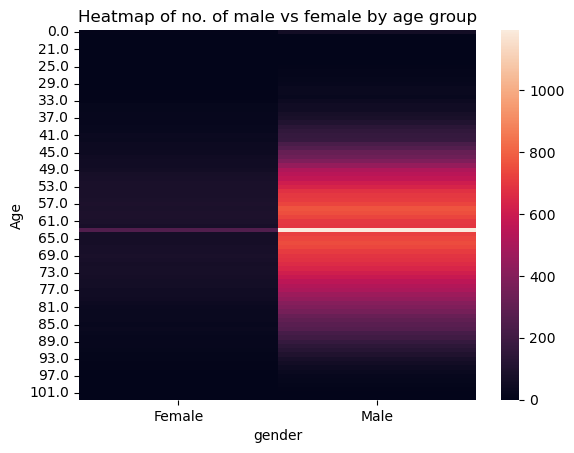

In [19]:
sns.heatmap(pd.crosstab(Billionaires['age'],Billionaires['gender']))
plt.ylabel('Age')
plt.title('Heatmap of no. of male vs female by age group')
plt.show()

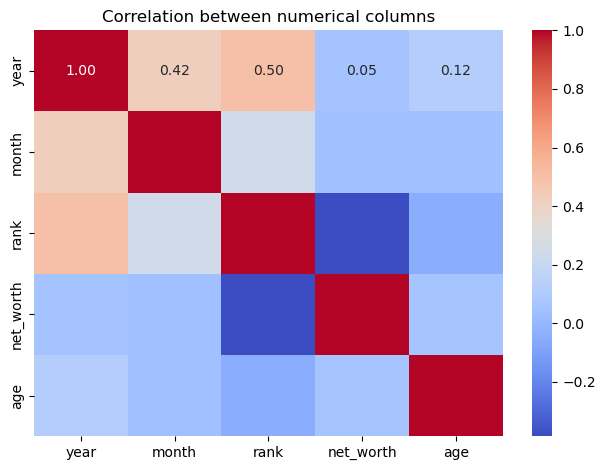

In [20]:
numeric_columns = Billionaires.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_columns.corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between numerical columns")
plt.tight_layout()
plt.show()

### For exploring certain areas we will take out unique individuals from the full_name column and filter the data-set based on that .

In [21]:
billionaires = Billionaires.drop_duplicates(subset=['full_name'],keep='last')

In [22]:
billionaires.head()

,year,month,rank,net_worth,last_name,first_name,full_name,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,self_made
0,1997,7,NaN,2.0,Sophonpanich,Chatri,Chatri Sophonpanich & family,73.0,Male,Thailand,Thailand,Bangkok,Finance and Investments,['Finance and Investments'],False
1,1997,7,NaN,1.8,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,69.0,Male,Thailand,NaN,NaN,NaN,NaN,False
3,1999,7,NaN,1.0,Hinduja,"Srichand, Gopichand,",Srichand & Gopichand Hinduja,63.0,NaN,India,United Kingdom,London,NaN,NaN,False
10,1999,7,NaN,2.5,Safra,Edmond,Edmond Safra,66.0,Male,Lebanon,NaN,NaN,NaN,NaN,True
17,2000,7,NaN,2.1,Kampf,Serge,Serge Kampf,66.0,Male,France,NaN,NaN,NaN,NaN,True


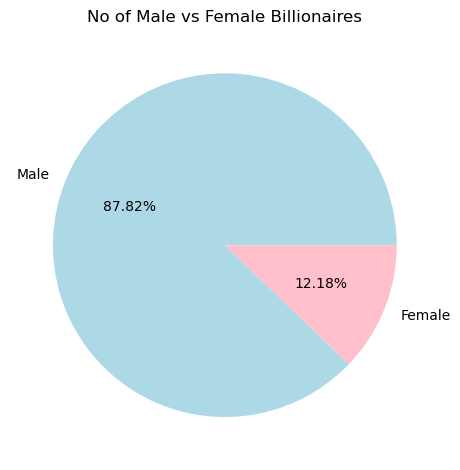

In [23]:
plt.pie(billionaires['gender'].value_counts(),labels=['Male','Female'],autopct='%.2f%%',colors=['lightblue','pink'])
plt.title('No of Male vs Female Billionaires')

plt.tight_layout()
plt.show()

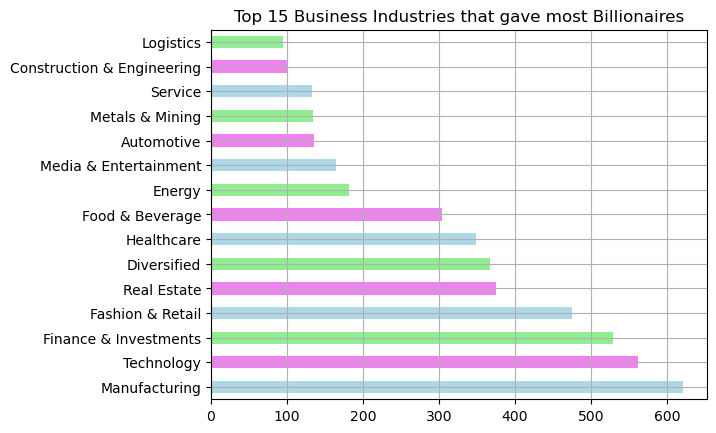

In [24]:
billionaires['business_category'].value_counts().head(15).plot(kind='barh',color=['lightblue','violet','lightgreen'])
plt.title('Top 15 Business Industries that gave most Billionaires')
plt.ylabel('')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Top 15 countries that gave most Billionaires')

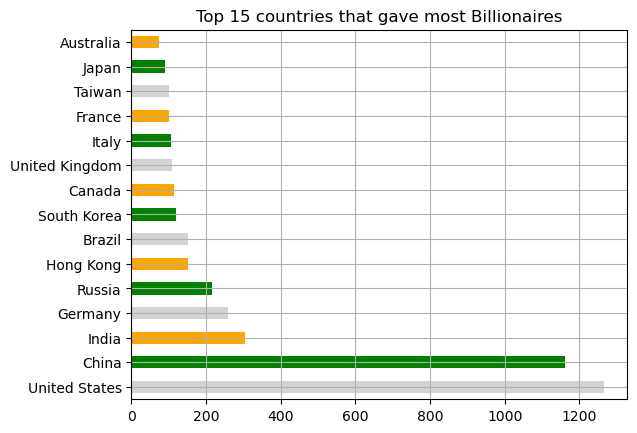

In [25]:
billionaires['country_of_citizenship'].value_counts().head(15).plot(kind='barh',color=['lightgrey','green','orange'])
plt.ylabel('')
plt.grid()
plt.title('Top 15 countries that gave most Billionaires')

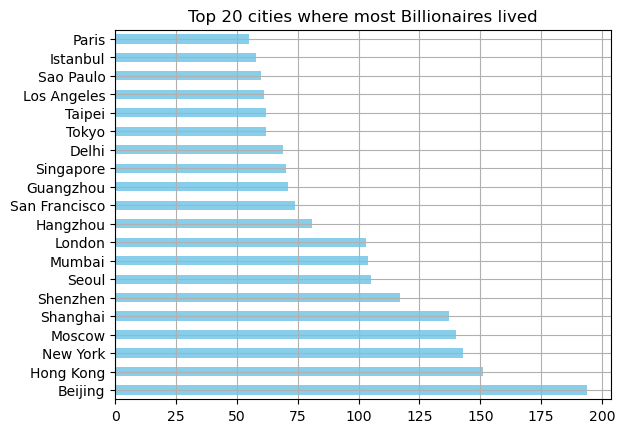

In [26]:
billionaires['city_of_residence'].value_counts().head(20).plot(kind='barh',color='skyblue')
plt.ylabel('')
plt.title('Top 20 cities where most Billionaires lived')
plt.grid()
plt.show()

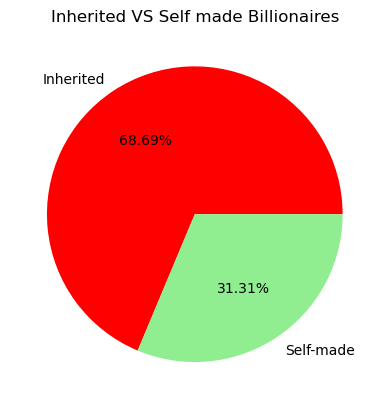

In [27]:
plt.pie(billionaires['self_made'].value_counts(),labels=['Inherited','Self-made'],autopct='%.2f%%',colors=['red','lightgreen'])
plt.title("Inherited VS Self made Billionaires")
plt.show()

# Trend of Individual Billionaires

In [28]:
def individual(name):
    fig , axes = plt.subplots(1,2,figsize=(10,4))
    
    plt.subplot(1,2,1)
    individual = Billionaires[Billionaires['full_name'] == name]
    individual_df = individual[['year','net_worth','rank']]
    sns.barplot(x=individual_df['year'],y=individual_df['net_worth'])
    plt.xticks(rotation=90)
    plt.xlabel('Passing Years')
    plt.ylabel("Net Worth in Billion Dollars")
    plt.title(f"{name}'s Wealth trend")
    
    plt.subplot(1,2,2)
    sns.lineplot(x=individual_df['year'],y=individual_df['rank'],marker='o')
    plt.xticks(rotation=90)
    plt.xlabel('Passing Years')
    plt.ylabel("Global Rank")
    plt.title(f"{name}'s Rank trend")
    
    plt.tight_layout()
    plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


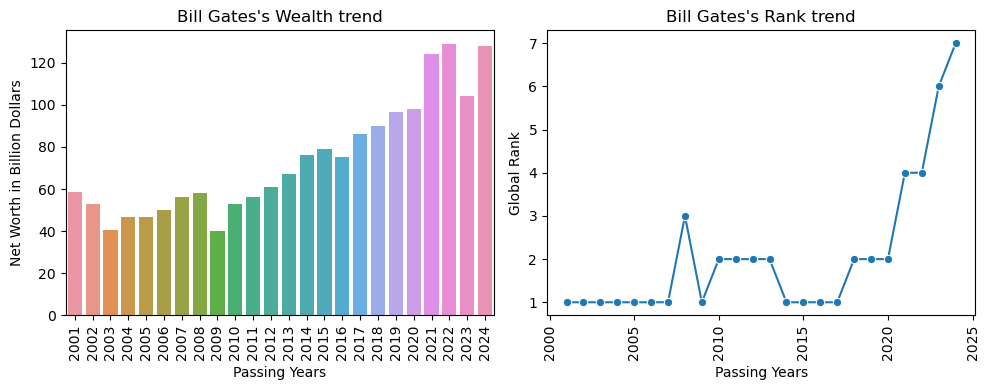

In [29]:
individual('Bill Gates')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


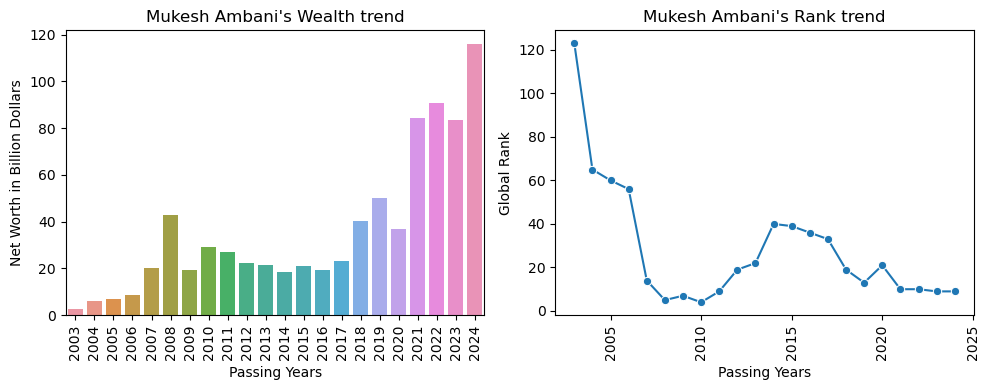

In [30]:
individual('Mukesh Ambani')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


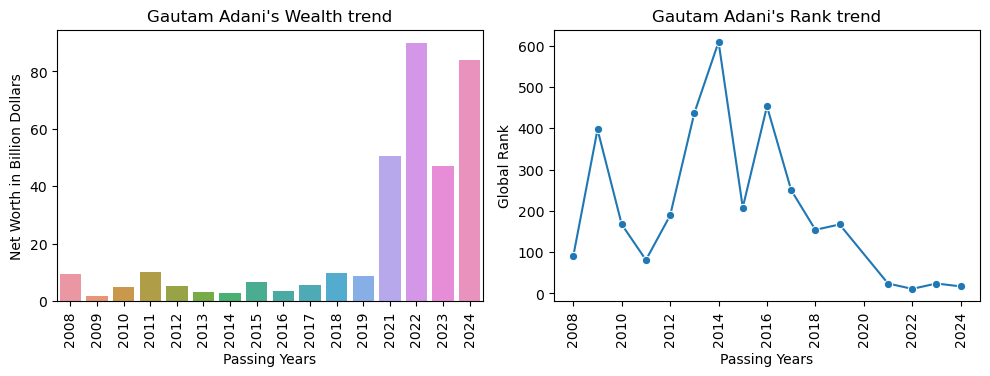

In [31]:
individual('Gautam Adani')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


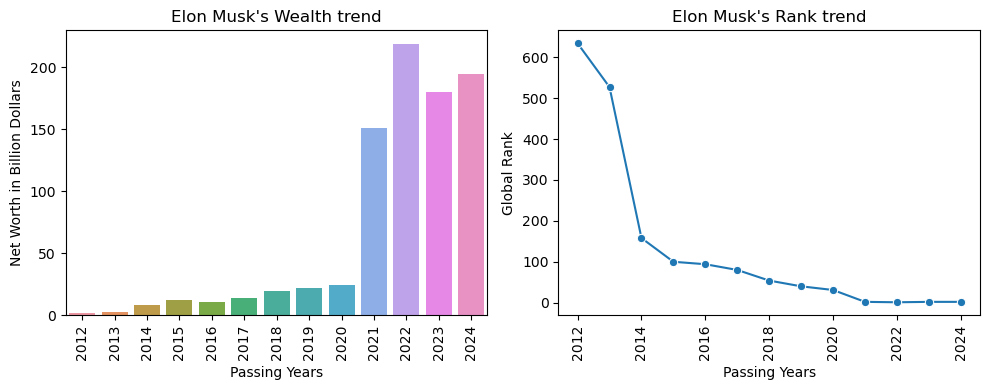

In [32]:
individual('Elon Musk')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


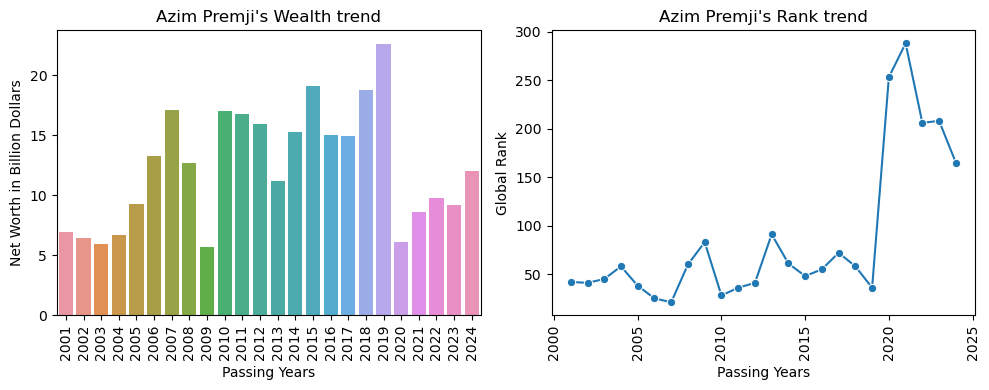

In [33]:
individual('Azim Premji')

# Country wise Analysis

In [34]:
def countrys(country):
    
    country_wise_data = billionaires[billionaires['country_of_citizenship'] == country]
    
    city_wise_billionaires = country_wise_data[['full_name'
                                     ,'city_of_residence']].groupby('city_of_residence').count().sort_values('full_name'
                                                                                                             ,ascending=False).head(10)

    a = country_wise_data[['full_name','net_worth','year']]
    b = a[a['year']==2024].sort_values('net_worth',ascending=False).head(10)

    indian_business_group = country_wise_data[['business_category'
                                               ,'full_name']].groupby('business_category').count().sort_values('full_name'
                                                                                                    ,ascending=False).head(6)

    self_made = country_wise_data[['self_made'
                                    ,'full_name']].groupby('self_made').count().head(5)
    
    custom_colors = ['red', 'lightgreen']
    
    fig , axes = plt.subplots(2,2,figsize=(10,8))
    
    try:
        plt.subplot(2,2,1)
        sns.barplot(x=city_wise_billionaires.index,y=city_wise_billionaires['full_name'],palette='pastel')
        sns.lineplot(x=city_wise_billionaires.index,y=city_wise_billionaires['full_name'],marker='o',color='black')
        plt.xticks(rotation=45)
        plt.xlabel('')
        plt.ylabel('Number of Billionaires')
        plt.title('Cities Local Billionaires lived in')
    except:
        print("No Graph means , nothing to show")
        
    try:    
        plt.subplot(2,2,2)
        sns.barplot(x=b['full_name'],y=b['net_worth'])
        plt.title(f'Top 10 Billionaires of {country} : 2024')
        plt.xticks(rotation=90)
        plt.xlabel('')
        plt.ylabel('Number of Billionaires')
        plt.grid()
    except:
        print("No Graph means , nothing to show")
        
    try:    
        plt.subplot(2,2,3)
        sns.barplot(x=indian_business_group.index,y=indian_business_group['full_name'],palette='deep')
        plt.xticks(rotation=30)
        plt.xlabel('')
        plt.grid()
        plt.ylabel('Number of Billionaires')
        plt.title(f'Industries that gave most Billionaires to {country}')
    except:
        print("No Graph means , nothing to show")
    
    try:
        plt.subplot(2,2,4)
        plt.pie(self_made['full_name'],labels=['Inherited','Self-made'],autopct='%.2f%%',colors=custom_colors)
        plt.title(f'Self made VS Inherited Billionaires in {country}')
    except:
        print("No Graph means , nothing to show")
        
        
    plt.tight_layout()
    plt.show()



C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


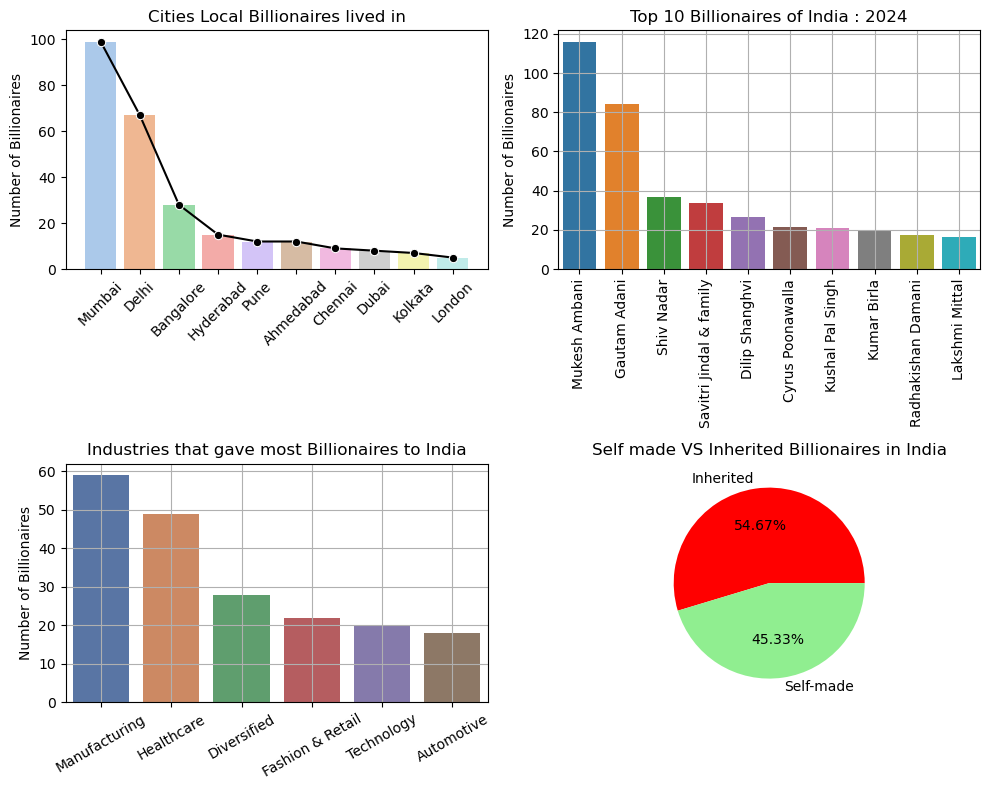

In [35]:
countrys('India')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


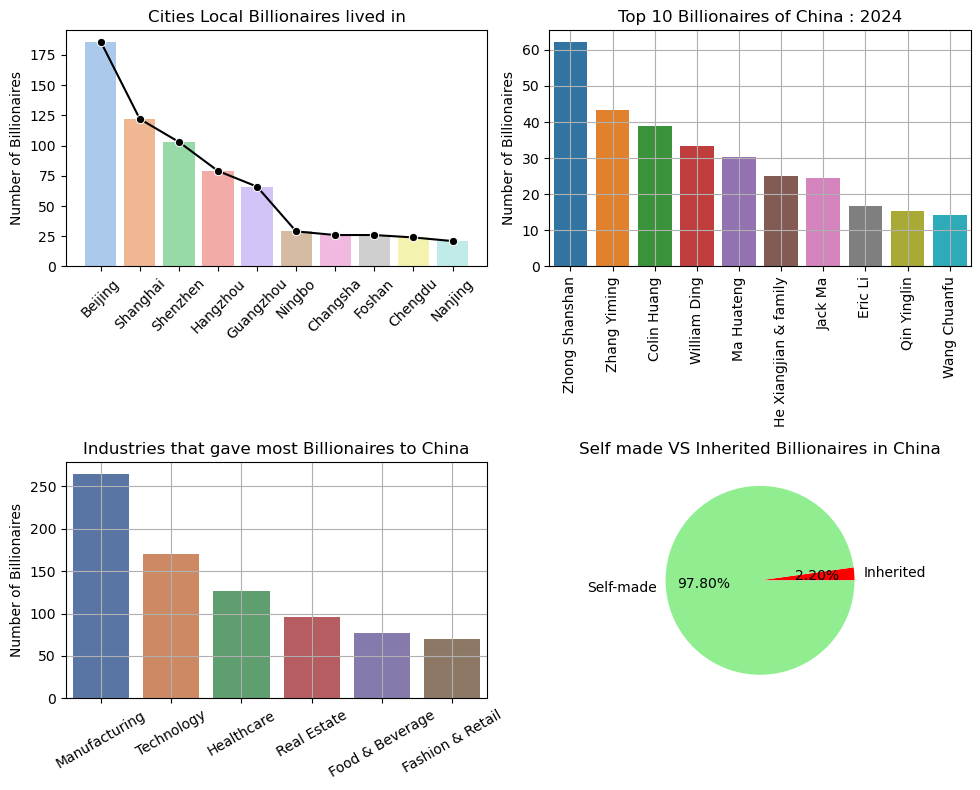

In [36]:
countrys('China')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


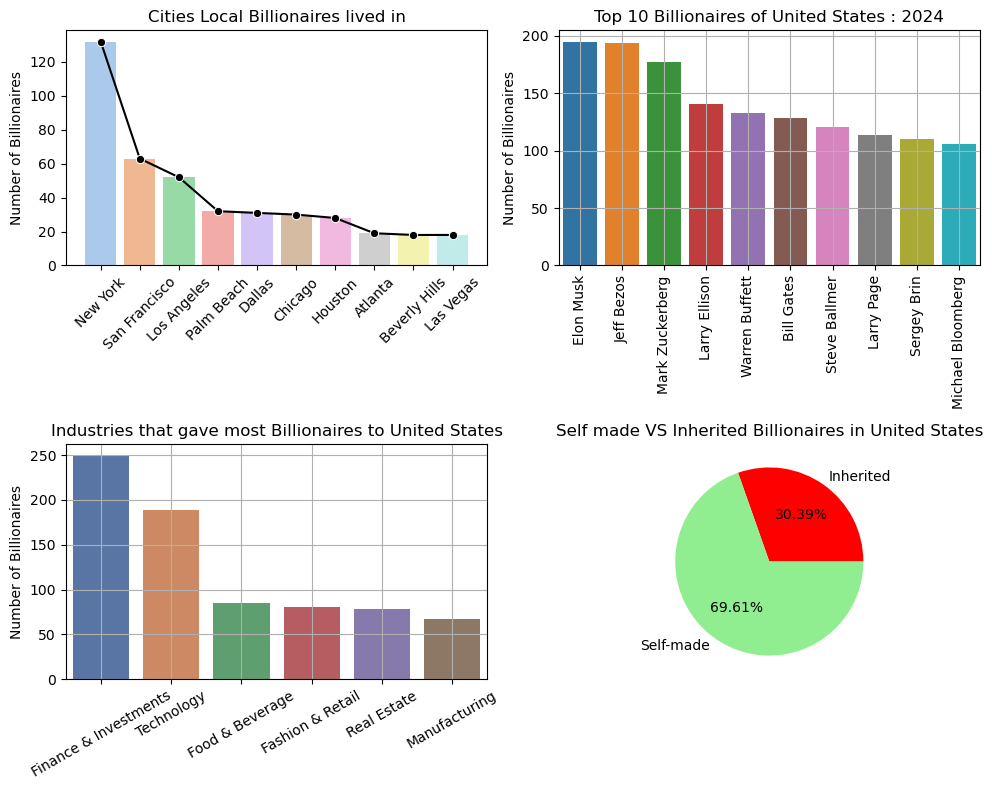

In [37]:
countrys('United States')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


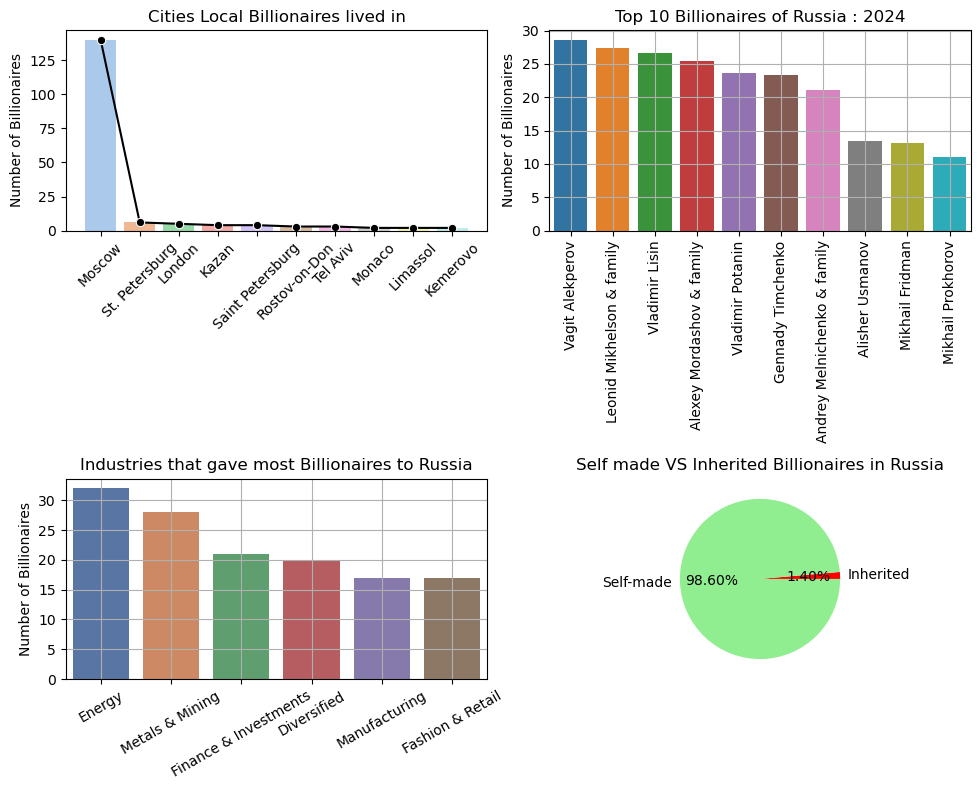

In [38]:
countrys('Russia')

# Industrial sector-wise analysis

In [49]:
def industry(indus):

    industries = billionaires[billionaires['business_category']==indus]
    
    fig ,axis = plt.subplots(1,2,figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.boxplot(y=industries['net_worth'],color='yellow')
    plt.title(f'Boxplot representing {indus} Billionaires')
    plt.xlabel(f'{len(industries)} Billionaires' )
    plt.ylabel('net worth in billion dollars')
    
    plt.subplot(1,2,2)
    plt.scatter(industries['age'],industries['net_worth'],marker='.',color='black')
    plt.title(f'{indus} Scatterplot : Age vs Net-Worth')
    plt.ylabel('net worth in billion dollars') 
    plt.xlabel('Age')
    
    plt.tight_layout()
    plt.show()

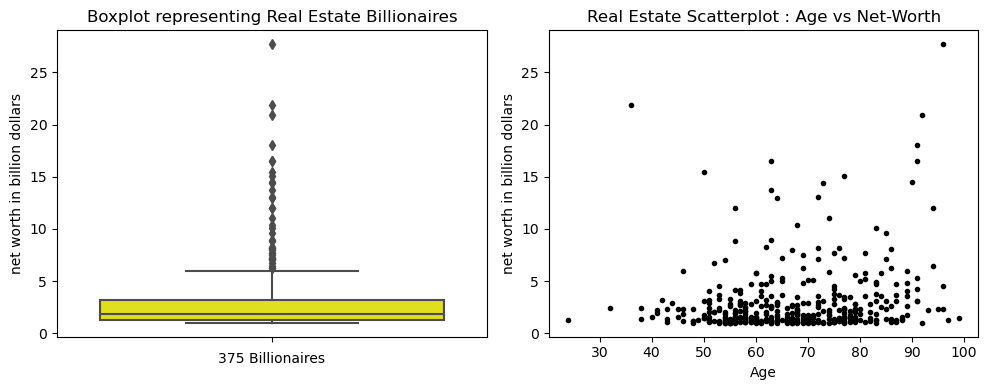

In [50]:
industry('Real Estate')

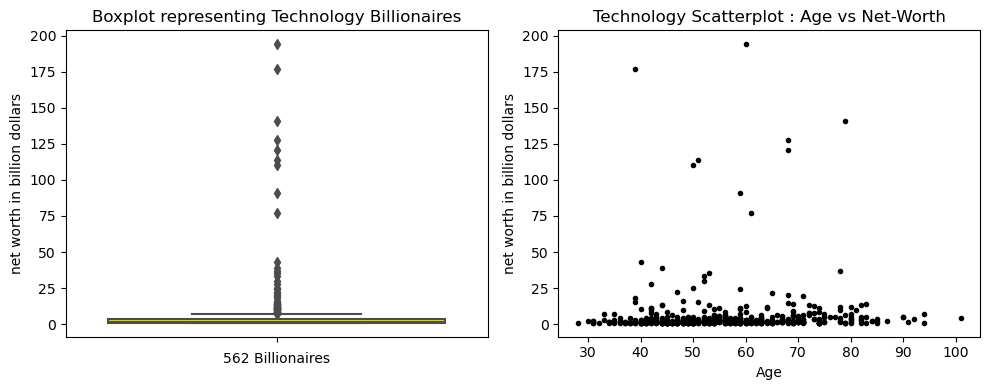

In [51]:
industry('Technology')

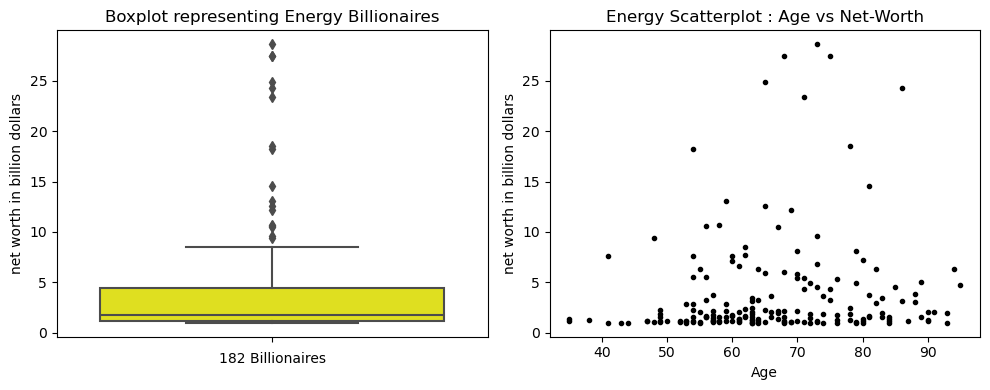

In [52]:
industry('Energy')

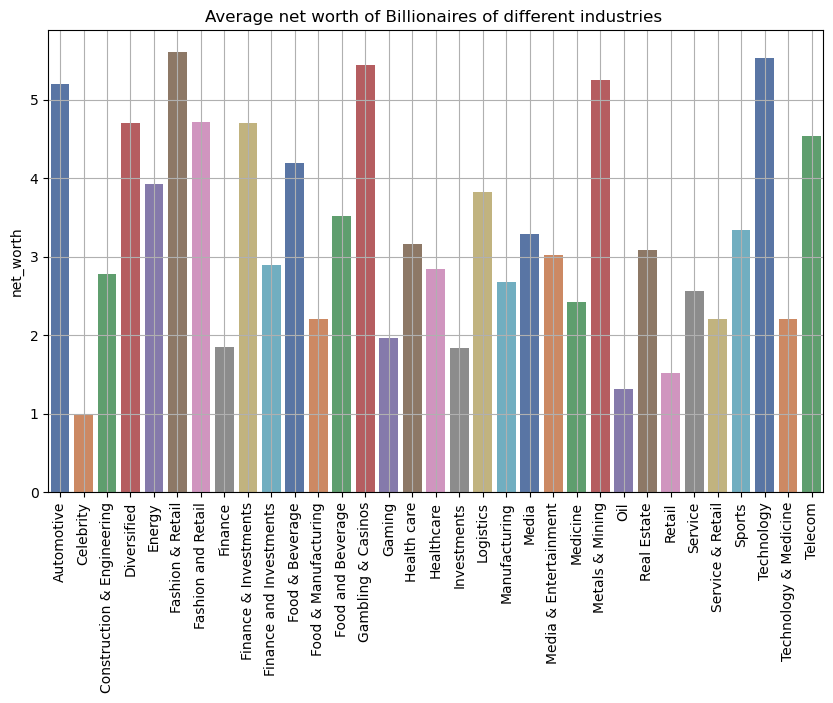

In [44]:
numcol=billionaires[['business_category','rank','age','net_worth']]
industry_group=numcol.groupby('business_category').mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=industry_group.index,y=industry_group['net_worth'],palette='deep')
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Average net worth of Billionaires in different industries ')
plt.grid()

plt.show()

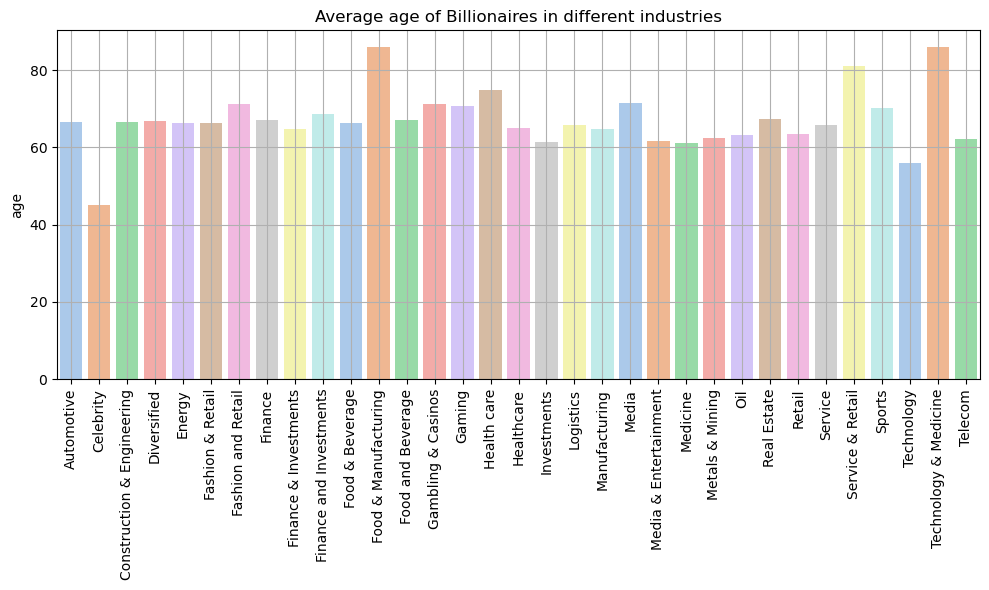

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_group.index,y=industry_group['age'],palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('')
plt.grid()
plt.title('Average age of Billionaires in different industries')

plt.tight_layout()
plt.show()

# Some interesting finding

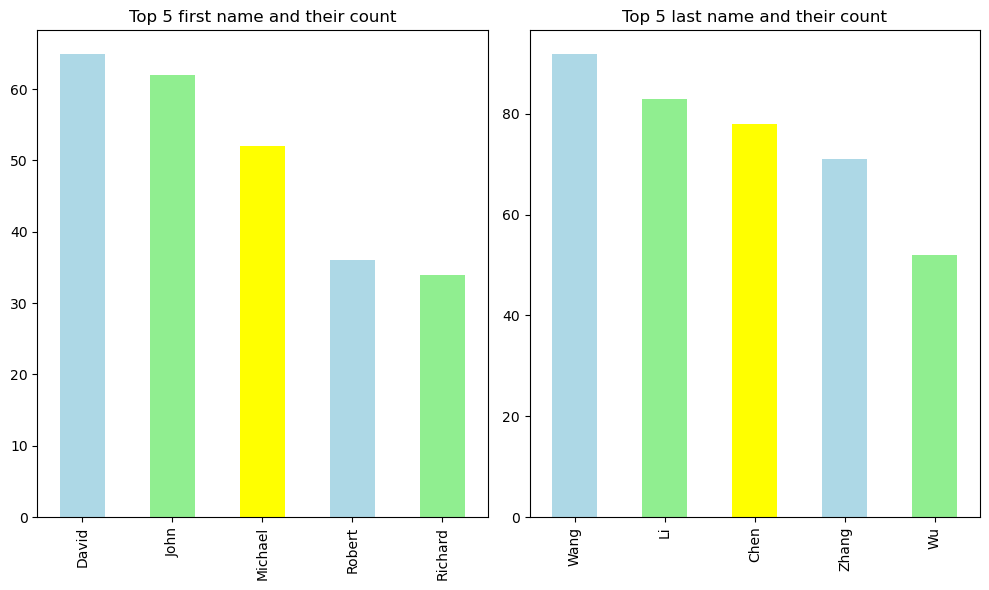

In [46]:
fid , axes = plt.subplots(1,2,figsize=(10,6))

plt.subplot(1,2,1)
billionaires['first_name'].value_counts().head(5).plot(kind='bar',color=['lightblue','lightgreen','yellow'])
plt.title('Top 5 first name and their count')
plt.xlabel('')

plt.subplot(1,2,2)
billionaires['last_name'].value_counts().head(5).plot(kind='bar',color=['lightblue','lightgreen','yellow'])
plt.title('Top 5 last name and their count')
plt.xlabel('')

plt.tight_layout()
plt.show()